In [207]:
import pandas as pd
import seaborn as sns
import numpy as np

TASK 1: ML for NLP & data insights

In [208]:
df = pd.read_csv('data.csv')
df.head()

,body,clusters_0,sentiment_positive_score,sentiment_negative_score,sentiment_combined_score,sentiment_summary,published_date,post_type,total_engagement,comments,shares,likes,author_gender,followers
0,During the pandemic government workers have de...,Poor Pay,7.170060,1.118036,1.511767,positive,"Nov 22, 2020",Reposts,0,0,0,0,Unknown,45747
1,I didn’t realize how poor I was until I got a ...,Poor Pay,3.428319,4.349932,-0.584664,negative,"May 7, 2021",Reposts,0,0,0,0,Female,82152
2,British people have this really dumb complex w...,Cost of Living,1.277756,3.769611,-1.428440,negative,"Jan 2, 2021",Reposts,0,0,0,0,Unknown,13581
3,Tory MPs have voted against a ban on residents...,Poor Pay,3.365988,5.851462,-0.899544,negative,"Apr 27, 2021",Reposts,0,0,0,0,Male,2976
4,The trouble with Rishi Sunak's upbeat message ...,Wage Growth,5.453477,2.944297,0.269810,neutral,"Oct 28, 2021",Reposts,0,0,0,0,Male,32501


Data Preprocessing: Checking for missing values

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   body                      1000 non-null   object 
 1   clusters_0                1000 non-null   object 
 2   sentiment_positive_score  1000 non-null   float64
 3   sentiment_negative_score  1000 non-null   float64
 4   sentiment_combined_score  1000 non-null   float64
 5   sentiment_summary         1000 non-null   object 
 6   published_date            1000 non-null   object 
 7   post_type                 1000 non-null   object 
 8   total_engagement          1000 non-null   int64  
 9   comments                  1000 non-null   int64  
 10  shares                    1000 non-null   int64  
 11  likes                     1000 non-null   int64  
 12  author_gender             1000 non-null   object 
 13  followers                 1000 non-null   int64  
dtypes: float6

We dont have any missing values in the dataset

Understanding the overall sentiment across the dataset

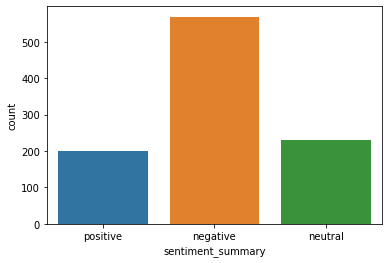

In [210]:
ax = sns.countplot(x="sentiment_summary", data=df)

Since we are working with dataset of economic struggles it is understandable to have majority of sentiment belonging to negative class. 

Trying to breakdown and understand each sentiment further

In [211]:
def create_groupby(df,column1, column2):
  group = df.groupby([column1,column2],as_index=False).size()
  return group
def create_groupby_agg(df,column1, column2):
  group = df.groupby([column1,column2],as_index=False).agg()
  return group

In [212]:
test = create_groupby(df,'sentiment_summary','clusters_0')
test.reset_index()


,index,sentiment_summary,clusters_0,size
0,0,negative,Cost of Living,39
1,1,negative,Council Tax,5
2,2,negative,Government Support,65
3,3,negative,House Prices,18
4,4,negative,Income Tax,12
...,...,...,...,...
63,63,positive,Small Businesses,2
64,64,positive,Social Care,10
65,65,positive,State Pension,14
66,66,positive,Statutory Sick Pay,4


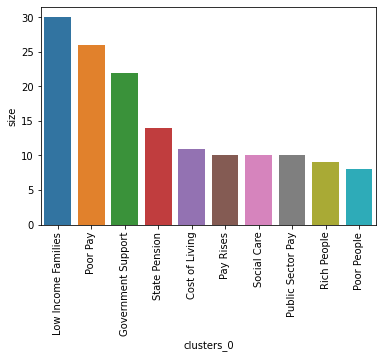

In [213]:
positive_df = test.loc[test['sentiment_summary'] == 'positive']
positive_df = positive_df.sort_values('size', ascending=False).nlargest(10, 'size')
ax = sns.barplot(x="clusters_0", y="size", data=positive_df,ci=None)
ax.tick_params(axis='x', rotation=90)

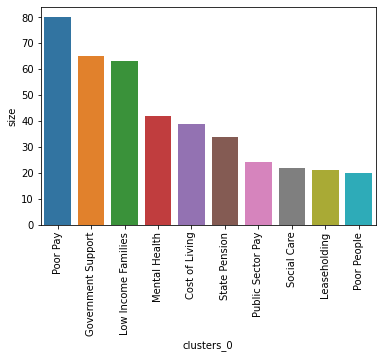

In [214]:
negative_df = test.loc[test['sentiment_summary'] == 'negative']
negative_df = negative_df.sort_values('size', ascending=False).nlargest(10, 'size')
ax = sns.barplot(x="clusters_0", y="size", data=negative_df,ci=None)
ax.tick_params(axis='x', rotation=90)

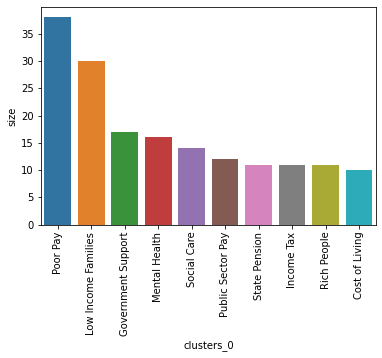

In [215]:
neutral_df = test.loc[test['sentiment_summary'] == 'neutral']
neutral_df = neutral_df.sort_values('size', ascending=False).nlargest(10, 'size')
ax = sns.barplot(x="clusters_0", y="size", data=neutral_df,ci=None)
ax.tick_params(axis='x', rotation=90)

In [216]:
gender_cluster = create_groupby(df,'author_gender','clusters_0')
gender_cluster.reset_index()
gender_cluster.head()

,author_gender,clusters_0,size
0,Female,Cost of Living,15
1,Female,Council Tax,3
2,Female,Gender Pay Gap,2
3,Female,Government Support,22
4,Female,House Prices,3


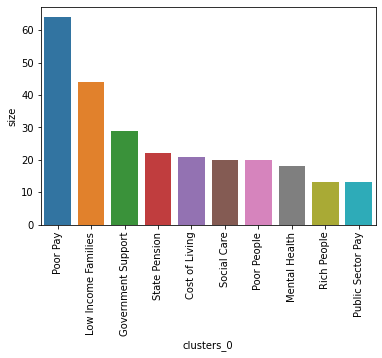

In [217]:
gender_df = gender_cluster.loc[gender_cluster['author_gender'] == 'Male']
gender_df = gender_df.sort_values('size', ascending=False).nlargest(10, 'size')
ax = sns.barplot(x="clusters_0", y="size", data=gender_df,ci=None)
ax.tick_params(axis='x', rotation=90)

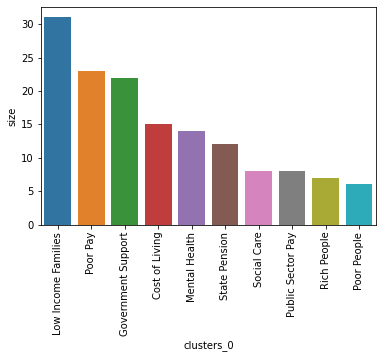

In [218]:
gender_df = gender_cluster.loc[gender_cluster['author_gender'] == 'Female']
gender_df = gender_df.sort_values('size', ascending=False).nlargest(10, 'size')
ax = sns.barplot(x="clusters_0", y="size", data=gender_df,ci=None)
ax.tick_params(axis='x', rotation=90)

In [219]:
!pip install flair

In [220]:
import re
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['cleaned_body'] = df['body'].apply(lambda x: remove_punct(x))

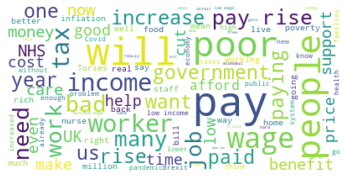

In [221]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt
# Start with one review:
tweet_All = " ".join(review for review in df.body)


# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)


plt.figure()
plt.imshow(wordcloud_ALL, interpolation="bilinear")
plt.axis("off")
plt.show()


In [223]:
def predict(sentence):
    """ Predict the sentiment of a sentence """
    if sentence == "":
        return 0
    text = Sentence(sentence)
    # stacked_embeddings.embed(text)
    classifier.predict(text)
    print (text.labels)
    try:
      value = text.labels[0].to_dict()['value'] 
      if value == 'POSITIVE':
          result = text.to_dict()['labels'][0]['confidence']
      else:
          result = -(text.to_dict()['labels'][0]['confidence'])
    except:
      continue

    return round(result, 3)

def get_scores(sentences):
    """ Call predict on every sentence of a text """
    results = []
    
    for i in range(0, len(sentences)): 
        results.append(predict(sentences[i]))
    return results

def get_sum(scores):
    
    result = round(sum(scores), 3)
    return result

SyntaxError: ignored

In [224]:
from flair.models import TextClassifier
from flair.data import Sentence
import string
classifier = TextClassifier.load('en-sentiment')
sentence = Sentence('Flair is pretty neat!')
classifier.predict(sentence)
# print sentence with predicted labels
print('Sentence above is: ', sentence.labels)
df['scores'] = df['cleaned_body'].apply(get_scores)
df['scores_sum'] = df.scores.apply(get_sum)

2021-11-29 11:53:43,189 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt
Sentence above is:  [POSITIVE (0.9997)]
[POSITIVE (0.6464)]
[NEGATIVE (0.6057)]
[POSITIVE (0.6417)]
[POSITIVE (0.7267)]
[NEGATIVE (0.5606)]
[NEGATIVE (0.529)]
[]


IndexError: ignored

In [ ]:
#Task 2 

In [225]:
df = pd.read_csv('Huawei.csv')
tweets = create_groupby_agg(df,'company','channel')
tweets.reset_index()
tweets.head()

TypeError: ignored

In [226]:
from collections import defaultdict
records = defaultdict(dict)
tweets = []
for key, grp in df.groupby(['company', 'channel']):

  records[key[0]][key[1]] = {}

print (records)



defaultdict(<class 'dict'>, {'Huawei': {'Twitter': {}}})


In [227]:
from collections import defaultdict
finalList = []
finalDict = {}
outer_dict = defaultdict(dict)
grouped = df.groupby(['company', 'channel'])
for key, value in grouped:

    dictionary = {}


    j = grouped.get_group(key).reset_index(drop=True)

    dictionary['tweet_created'] = j.at[0, 'tweet_created']


    tweets = []
    tweets_dict = {}
    metrics_dict = {}

    for i in j.index:

        tweets_dict['tweet_id'] = j.at[i, 'tweet_id']
        tweets_dict['type'] = j.at[i, 'type']
        tweets_dict['tweet'] = j.at[i, 'tweet']
        tweets_dict['Metrics'] = [{'favorite_count':j.at[i,'favorite_count'],'replies_count':j.at[i,'replies_count'], 'retweet_count':j.at[i,'retweet_count'], 'unmetric_engagement':j.at[i,'unmetric_engagement_score']}]
        tweets_dict['url'] = j.at[i, 'url']

        tweets.append(tweets_dict.copy())

    dictionary['tweets'] = tweets
    outer_dict[key[0]][key[1]] = dictionary

    finalList.append(outer_dict)
print (finalList)



[defaultdict(<class 'dict'>, {'Huawei': {'Twitter': {'tweet_created': '01/02/2018', 'tweets': [{'tweet_id': 9.59268e+17, 'type': 'proactive', 'tweet': 'Fast, flexible & easy: Huawei #CloudCampus enables smart applications that matter to your business: https://t.co/MSQDgGlJCv https://t.co/SXnA95lsv8', 'Metrics': [{'favorite_count': 101, 'replies_count': 3, 'retweet_count': 28, 'unmetric_engagement': 396}], 'url': 'http://www.twitter.com/Huawei/status/959267868213854209'}, {'tweet_id': 9.59262e+17, 'type': 'proactive', 'tweet': '#AllCloudNetwork is shaping a fully connected, intelligent future unbound by time & space. Are you ready? #MWC18 https://t.co/0icF8NNRax https://t.co/', 'Metrics': [{'favorite_count': 74, 'replies_count': 1, 'retweet_count': 17, 'unmetric_engagement': 249}], 'url': 'http://www.twitter.com/Huawei/status/959262458023002113'}, {'tweet_id': 9.59e+17, 'type': 'proactive', 'tweet': '#AllCloudNetwork is shaping a fully connected, intelligent future unbound by bound by t

In [228]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

In [229]:
import json
json_data = json.dumps(finalList, cls=NpEncoder)

print(json_data)

[{"Huawei": {"Twitter": {"tweet_created": "01/02/2018", "tweets": [{"tweet_id": 9.59268e+17, "type": "proactive", "tweet": "Fast, flexible & easy: Huawei #CloudCampus enables smart applications that matter to your business: https://t.co/MSQDgGlJCv https://t.co/SXnA95lsv8", "Metrics": [{"favorite_count": 101, "replies_count": 3, "retweet_count": 28, "unmetric_engagement": 396}], "url": "http://www.twitter.com/Huawei/status/959267868213854209"}, {"tweet_id": 9.59262e+17, "type": "proactive", "tweet": "#AllCloudNetwork is shaping a fully connected, intelligent future unbound by time & space. Are you ready? #MWC18 https://t.co/0icF8NNRax https://t.co/", "Metrics": [{"favorite_count": 74, "replies_count": 1, "retweet_count": 17, "unmetric_engagement": 249}], "url": "http://www.twitter.com/Huawei/status/959262458023002113"}, {"tweet_id": 9.59e+17, "type": "proactive", "tweet": "#AllCloudNetwork is shaping a fully connected, intelligent future unbound by bound by time & space. Are you ready? 